# Font Analyze

In [1]:
%matplotlib inline

import pathlib
import collections
from typing import Mapping

import numpy
import matplotlib.pyplot as plt

In [2]:
articles = {}
words = collections.Counter()
for path in pathlib.Path('../pages').glob('**/*.mdx'):
    with path.open() as f:
        article = f.read().replace('\n', '')
    words.update(article)
    articles[path] = collections.Counter(article)

wordlist = list(words.items())
wordlist.sort(key=lambda x: x[0])
wordlist.sort(key=lambda x: x[1])
wordlist = numpy.array(wordlist)

articlelist = [[v[w[0]] for w in wordlist] for k, v in articles.items()]
articlelist.sort(key=lambda x: sum(x))

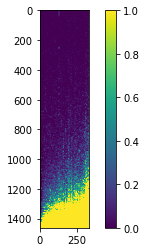

In [3]:
heatmap = numpy.array(articlelist).T

plt.imshow(heatmap, vmin=0, vmax=1)
plt.colorbar()

## Character Count
記事のことはあまり考えずに、出現回数だけカウントしたもの

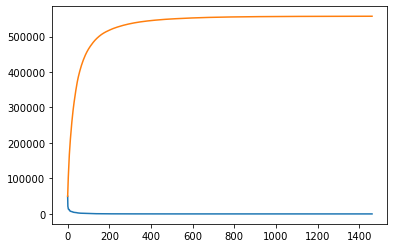

In [4]:
usage = heatmap.sum(axis=1)[::-1]
usage_sum = numpy.cumsum(usage)
plt.plot(usage)
plt.plot(usage_sum)

In [5]:
thresholds_y = [
    usage_sum[-1] * p
    for p in [0.95, 0.75, 0.5, 0.25]
]
thresholds_x = [
    numpy.where(usage_sum >= t)[0][0]
    for t in thresholds_y
]

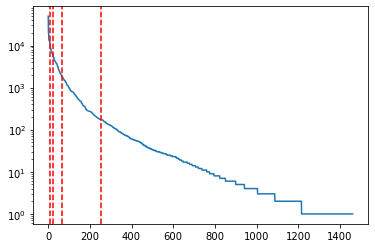

In [6]:
plt.plot(usage)
for t in thresholds_x:
    plt.axvline(t, ls='--', color='red')
plt.yscale('log')

In [7]:
[(usage_sum < t).sum() for t in thresholds_y]

[254, 66, 24, 6]

In [8]:
wordlist[usage_sum[::-1] < thresholds_y[0], 0]

array(['べ', 'ぽ', '対', 'ペ', '今', '日', '?', '前', '付', '込', '要', '単', '最',
       '読', '意', 'ネ', '手', '値', '思', '度', '字', 'ェ', 'ム', '示', '語', '考',
       '回', '面', '&', '場', '結', '的', '良', '通', '名', '法', '無', '\\', '像',
       'ょ', '何', 'ュ', 'ャ', '取', '上', '時', 'エ', '下', '関', 'X', 'カ', '事',
       '表', '文', 'チ', '合', '見', 'ソ', 'ョ', '設', '画', 'ろ', 'キ', 'セ', '）',
       '？', '!', '（', '用', 'モ', '変', '以', '一', '言', '記', 'V', 'q', '入',
       'パ', 'W', 'ウ', 'テ', 'ァ', 'ブ', '実', 'ゃ', 'バ', 'サ', 'ィ', 'ず', 'お',
       '分', '行', '動', 'せ', 'z', '方', 'め', 'メ', 'わ', 'マ', 'ば', '来', '定',
       '感', '作', '書', 'グ', 'シ', 'H', 'デ', 'ね', 'ア', 'レ', '\t', 'ジ', 'ロ',
       '・', '数', 'フ', 'G', 'ち', '$', '}', 'U', '{', 'つ', 'コ', 'タ', 'F',
       'B', '|', 'え', '%', '+', 'ど', 'O', 'じ', ';', 'そ', 'N', '7', 'R',
       'ラ', '出', 'M', 'L', 'や', 'プ', 'リ', 'ド', 'ッ', 'き', '<', 'j', 'さ',
       'D', 'A', '6', '8', 'ク', '使', 'E', 'あ', '#', '9', 'よ', 'C', 'I',
       'け', 'だ', 'み', 'P', 'S', '4', 'ス', 'ル', 'く', 'イ', '5', 